In [1]:
import pandas as pd
pd.options.display.max_columns = 100
GYD_muts_df = pd.read_pickle("./data/GYD_df.pkl")
GYD_muts_df.shape

(163, 45)

In [2]:
# What is generated by this cell is to be used by mutfunc.com
pdb_serial = "P0A6F3"
cnt = 0
for s in GYD_muts_df[GYD_muts_df["mutation target annotation"].str.contains("glpK")]["Details"]:
    print(pdb_serial + ' ' + s.split(' ')[0])
    cnt += 1
print(cnt)

P0A6F3 S59Y
P0A6F3 N229H
P0A6F3 W54L
P0A6F3 T56A
P0A6F3 S59Y
P0A6F3 K96Q
P0A6F3 T236K
P0A6F3 N229K
P0A6F3 D73A
P0A6F3 R34H
P0A6F3 D73V
P0A6F3 K96E
P0A6F3 A55T
P0A6F3 S17A
P0A6F3 R34S
P0A6F3 K173T
P0A6F3 K96Q
P0A6F3 A66S
P0A6F3 P97H
P0A6F3 D73V
P0A6F3 S59Y
P0A6F3 T236K
P0A6F3 K96Q
P0A6F3 D73A
P0A6F3 A441V
P0A6F3 D73V
P0A6F3 S59Y
P0A6F3 D73V
28


In [3]:
annot_df = pd.read_csv("./data/glpK_mutations.csv")
annot_df.head()

,Reference Seq,Position,Mutation Type,Sequence Change,Gene,Details,plot annotation,sub-genetic target annotation,sub-genetic target annotation.1,A1 F280 I0 R1,A2 F182 I0 R1,A2 F182 I1 R1,A3 F176 I0 R1,A4 F195 I0 R1,A4 F195 I0 R2,A4 F195 I1 R1,A5 F216 I0 R1,A5 F216 I1 R1,A6 F187 I0 R1,A6 F187 I0 R2,A6 F187 I1 R1,A7 F106 I0 R1,A7 F106 I1 R1,A8 F104 I0 R1,A8 F104 I1 R1,A9 F105 I0 R1,A9 F105 I1 R1,A10 F106 I0 R1,A10 F106 I1 R1,A11 F109 I0 R1,A11 F109 I1 R1,A12 F114 I0 R1,A13 F69 I0 R1,A13 F69 I1 R1,A14 F68 I0 R1,A14 F68 I1 R1,A15 F71 I0 R1,A15 F71 I1 R1,A16 F70 I0 R1,A16 F70 I1 R1,A17 F70 I0 R1,A17 F70 I1 R1,A18 F70 I0 R1,A18 F70 I1 R1,A19 F34 I0 R1,A19 F34 I1 R1,A20 F33 I0 R1,A20 F33 I1 R1,A21 F39 I0 R1,A21 F39 I1 R1,A22 F44 I0 R1,A22 F44 I1 R1,A23 F41 I0 R1,A23 F41 I1 R1,A24 F42 I0 R1,A24 F42 I1 R1,A25 F36 I0 R1,A25 F36 I0 R2,A25 F36 I1 R1,A26 F25 I0 R1,A26 F25 I0 R2,A26 F25 I1 R1,A27 F34 I0 R1,A27 F34 I0 R2,A27 F34 I1 R1,A28 F34 I0 R1,A28 F34 I0 R2,A28 F34 I1 R1,A29 F31 I0 R1,A29 F31 I0 R2,A29 F31 I1 R1,A30 F33 I0 R1,A30 F33 I0 R2,A30 F33 I1 R1,A34 F5 I0 R1,A35 F9 I0 R1
0,NC_000913,4117027.0,SNP,C→A,glpK,A66S (GCG→TCG),associated with FBP binding,A → T: Although it completely abolishes FBP re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NC_000913,4116516.0,SNP,G→T,glpK,T236K (ACG→AAG),FBP binding site,Allosteric FBP inhibitor binding (The Uniprot ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NC_000913,4117005.0,SNP,T→A,glpK,D73V (GAT→GTT),subunit interaction interface,Interface of subunit interaction (Herring et a...,"""could affect the binding of the allosteric re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NC_000913,4117005.0,SNP,T→G,glpK,D73A (GAT→GCT),subunit interaction interface,Interface of subunit interaction (Herring et a...,"""could affect the binding of the allosteric re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC_000913,4116705.0,SNP,T→G,glpK,K173T (AAA→ACA),computationally predicted stability,Predicted change in stability (Wagih et al. 2018),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import numpy as np

characterization_count_d = {x:0 for x in annot_df["plot annotation"]}
if np.nan in characterization_count_d.keys():
    del characterization_count_d[np.nan]

for _, m in GYD_muts_df[GYD_muts_df["mutation target annotation"]=="glpK"].iterrows():
    df = annot_df[annot_df["Details"]==m["Details"]]
    characterization_count_d[df.iloc[0]["plot annotation"]] += 1
    
display(characterization_count_d)

{'associated with FBP binding': 1,
 'FBP binding site': 2,
 'subunit interaction interface': 10,
 'computationally predicted stability': 2,
 'uncharacterized': 13}

,count,type,proportion
0,1,associated with FBP binding,0.035714
1,2,FBP binding site,0.071429
3,2,computationally predicted stability,0.071429
2,10,subunit interaction interface,0.357143
4,13,uncharacterized,0.464286


,index,count,type,proportion
0,0,1,associated with FBP binding,0.035714
1,1,2,FBP binding site,0.071429
2,3,2,computationally predicted stability,0.071429
3,2,10,subunit interaction interface,0.357143
4,4,13,uncharacterized,0.464286


0

index                                   0
count                                   1
type          associated with FBP binding
proportion                      0.0357143
Name: 0, dtype: object

1

index                        1
count                        2
type          FBP binding site
proportion           0.0714286
Name: 1, dtype: object

2

index                                           3
count                                           2
type          computationally predicted stability
proportion                              0.0714286
Name: 2, dtype: object

3

index                                     2
count                                    10
type          subunit interaction interface
proportion                         0.357143
Name: 3, dtype: object

4

index                       4
count                      13
type          uncharacterized
proportion           0.464286
Name: 4, dtype: object

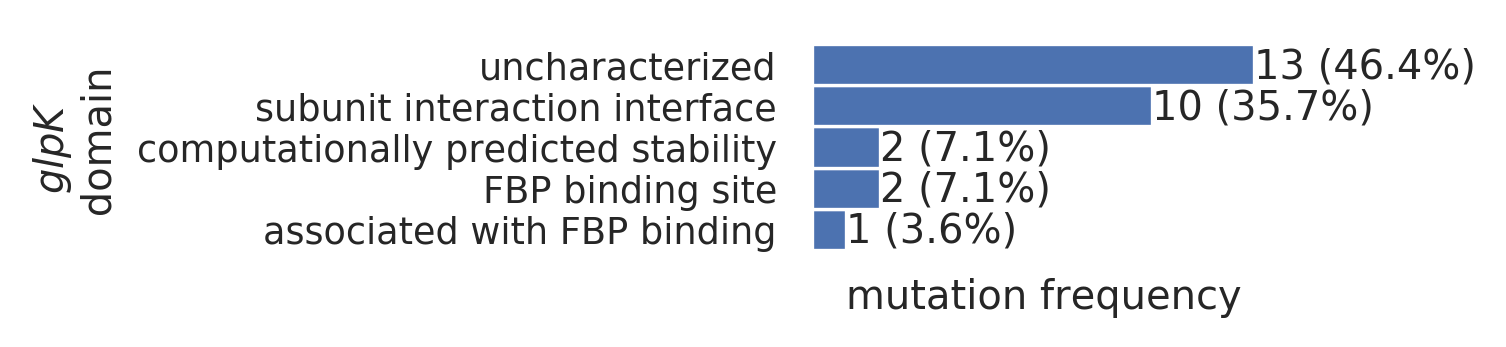

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("white")

df = pd.DataFrame(columns=["count", "type"])
for k, v in characterization_count_d.items():
    df = df.append({"type": k, "count": v}, ignore_index=True)
df["proportion"] = df['count'].apply(lambda cnt: cnt/sum(df["count"]))
df = df.sort_values(by="count", ascending=True)
display(df)

ax = df.plot.barh(
    y="count",
    x="type",
    color="#4C72B0",
#     color="#4169e1",
    figsize=(2,1),
    width=1
)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off

df = df.reset_index()  # Resetting index for the below annotations to work
display(df)
for i, r in df.iterrows(): 
    display(r)
    s = str(int(r["count"])) +' ({0:.1f}%)'.format(r["proportion"] * 100)
#     s = str(int(r["count"]))
    ax.text(r["count"], i-0.3,  s)
    
sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# ax.set_title("The proportion of $\it{glpK}$\nSNP targets")
ax.set_ylabel('$\it{glpK}$\n domain')
ax.set_xlabel("mutation frequency")
plt.savefig("fig.svg", format="svg")